In [6]:
import csv
import math
import random
import numpy as np
import matplotlib.pyplot as plt 
from operator import itemgetter
from collections import Counter

In [7]:
iris_file_path = "data/iris.data"

iris_classes = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

In [8]:
def read_data(file_path):
    matrix = list()
    with open(file_path, newline='') as file:
        reader = csv.reader(file, delimiter=',', quotechar='|')
        for row in reader:
            row[4] = iris_classes.index(row[4])
            matrix_row = [float(x) for x in row[:-1]]
            matrix_row.append(row[4])
            matrix.append(matrix_row)
    return matrix

In [49]:
def calculate_scalar_product(x, y):
    assert len(x) == len(y)
    
    product = 0
    
    for i in range(0, len(x)):
        product += x[i] * y[i]
    
    return product


def calculate_euqlid_distance(x, y):
    assert len(x) == len(y)
    
    difference = list()
    for i in range(0, len(x)):
        difference.append(x[i] - y[i])
        
    assert len(difference) == len(x)
    
    return math.sqrt(calculate_scalar_product(difference, difference))

In [50]:
MARK_INDEX = 4

def classify(point, train_set, k):
    assert len(train_set[0]) == 5
    distances_and_marks = list()
    
    for x in train_set:
        distance = math.sqrt(calculate_euqlid_distance(point, x[:-1]))
        distances_and_marks.append((distance, x[MARK_INDEX]))
        
    distances_and_marks.sort(key=itemgetter(0))
    
    counter = Counter()
    for distance, mark in distances_and_marks[:k]:
        counter[mark] += 1
    
    return counter.most_common(1)[0][0]

In [51]:
def learn_k_fold(folds_count, train_set, k_values):
    results = list()
    fold_size = len(train_set) // folds_count
    
    for k in k_values:
        accuracies = list()
        errors = list()
        for fold in range(folds_count):
            validate_sample = train_set[fold * fold_size : (fold + 1) * fold_size]

            learn_sample = train_set[0 : fold * fold_size] + train_set[(fold + 1) * fold_size:]
                
            assert len(validate_sample) + len(learn_sample) == len(train_set)
                
            assert len(validate_sample) == fold_size
            assert len(validate_sample) == fold_size
            
            bad_count = 0
            good_count = 0
            for item in validate_sample:
                mark = classify(item[:-1], learn_sample, k)
                if mark == item[MARK_INDEX]:
                    good_count += 1
                else:
                    bad_count += 1
            
            accuracies.append(good_count / len(validate_sample))
            errors.append(bad_count / len(validate_sample)) # error returned not in percents
                
                
        # Calculate average error
        average_accuracy = sum(accuracies) / folds_count
        print("Cross Validation Accuracy = ", average_accuracy)
        average_error = sum(errors) / folds_count
        print("Cross Validation Error = ", average_error)
        sd = math.sqrt(sum([(average_error - error)**2 for error in errors]) / folds_count)
        print("Standard Deviation = ", sd)
    
            
        results.append((k, average_accuracy, average_error, sd))
    
    return results

Original dataset


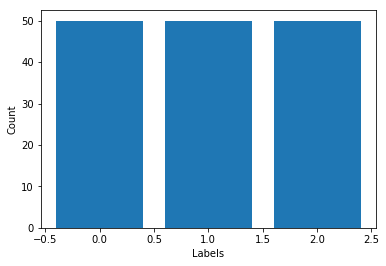

Test dataset


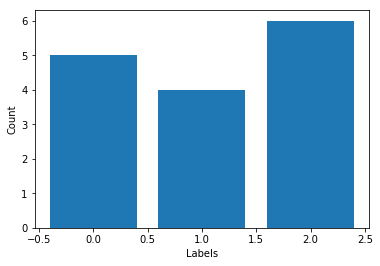

In [100]:
def draw_distribution(sample):
    counter = Counter()
    for element in sample:
        counter[element[MARK_INDEX]] += 1
    

    hist_marks = list()
    hist_counts = list()
    for mark, count in counter.items():
        hist_marks.append(mark)
        hist_counts.append(count)
    
    
    plt.bar(hist_marks, hist_counts)
    plt.xlabel("Labels")
    plt.ylabel("Count")
    plt.show()

    
iris_data = read_data(iris_file_path)
random.shuffle(iris_data)

test_sample_size = len(iris_data) // 10
test_sample = iris_data[:test_sample_size]
learn_sample = iris_data[test_sample_size:]

assert len(test_sample) + len(learn_sample) == len(iris_data)

print("Original dataset")
draw_distribution(iris_data)

print("Test dataset")
draw_distribution(test_sample)

Cross Validation Accuracy =  0.9555555555555557
Cross Validation Error =  0.044444444444444446
Standard Deviation =  0.04444444444444444
Cross Validation Accuracy =  0.9555555555555557
Cross Validation Error =  0.044444444444444446
Standard Deviation =  0.04444444444444444
Cross Validation Accuracy =  0.9629629629629631
Cross Validation Error =  0.037037037037037035
Standard Deviation =  0.03312693299999688
Cross Validation Accuracy =  0.9629629629629631
Cross Validation Error =  0.037037037037037035
Standard Deviation =  0.03312693299999688
Cross Validation Accuracy =  0.9629629629629631
Cross Validation Error =  0.037037037037037035
Standard Deviation =  0.03312693299999688
Cross Validation Accuracy =  0.9555555555555557
Cross Validation Error =  0.044444444444444446
Standard Deviation =  0.04444444444444444
Cross Validation Accuracy =  0.9703703703703704
Cross Validation Error =  0.02962962962962963
Standard Deviation =  0.045662325947918345
Cross Validation Accuracy =  0.9629629629

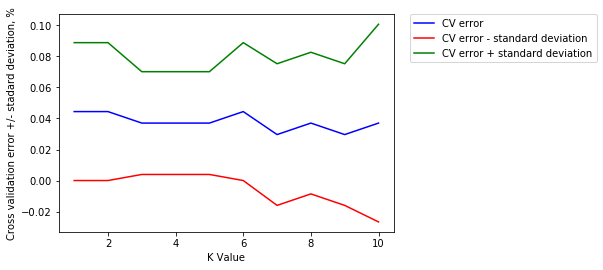

In [101]:
k_values = range(1, 11)

k_fold_result = learn_k_fold(9, learn_sample, k_values)

error_values = list()
error_values_with_sd = list()
error_values_without_sd = list()
for k, acc, err, sd in k_fold_result:
    error_values.append(err)
    error_values_with_sd.append(err + sd)
    error_values_without_sd.append(err - sd)

plt.plot(k_values, error_values, 'b', label = "CV error")
plt.plot(k_values, error_values_without_sd, 'r', label = "CV error - standard deviation") 
plt.plot(k_values, error_values_with_sd, 'g', label = "CV error + standard deviation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("K Value")
plt.ylabel("Сross validation error +/- stadard deviation, %")
plt.show()

Cross Validation Accuracy =  0.9629629629629631
Cross Validation Error =  0.03703703703703704
Standard Deviation =  0.06372092790401947
Cross Validation Accuracy =  0.9703703703703704
Cross Validation Error =  0.02962962962962963
Standard Deviation =  0.045662325947918345
Cross Validation Accuracy =  0.9333333333333331
Cross Validation Error =  0.06666666666666668
Standard Deviation =  0.0628539361054709
Cross Validation Accuracy =  0.940740740740741
Cross Validation Error =  0.05925925925925926
Standard Deviation =  0.06625386599999378
Cross Validation Accuracy =  0.9407407407407408
Cross Validation Error =  0.05925925925925926
Standard Deviation =  0.05832598425193934
Cross Validation Accuracy =  0.9185185185185186
Cross Validation Error =  0.08148148148148147
Standard Deviation =  0.08181748901620192
Cross Validation Accuracy =  0.9037037037037039
Cross Validation Error =  0.0962962962962963
Standard Deviation =  0.10475656017578482
Cross Validation Accuracy =  0.5925925925925927
Cr

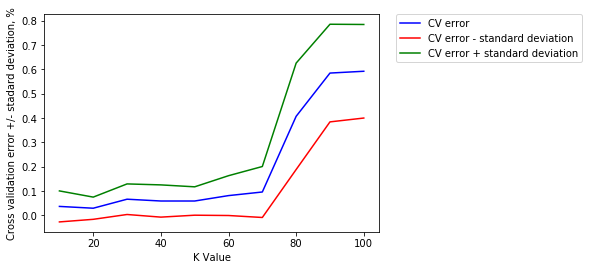

In [102]:
k_values = range(10, 110, 10)

k_fold_result = learn_k_fold(9, learn_sample, k_values)

error_values = list()
error_values_with_sd = list()
error_values_without_sd = list()
for k, acc, err, sd in k_fold_result:
    error_values.append(err)
    error_values_with_sd.append(err + sd)
    error_values_without_sd.append(err - sd)

plt.plot(k_values, error_values, 'b', label = "CV error")
plt.plot(k_values, error_values_without_sd, 'r', label = "CV error - standard deviation") 
plt.plot(k_values, error_values_with_sd, 'g', label = "CV error + standard deviation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("K Value")
plt.ylabel("Сross validation error +/- stadard deviation, %")
plt.show()

In [106]:
best_k = 4

bad_count = 0
good_count = 0
for item in test_sample:
    mark = classify(item[:-1], learn_sample, best_k)
    if mark == item[MARK_INDEX]:
        good_count += 1
    else:
        bad_count += 1
        
print("Accurancy: %f; error: %f" % (good_count / len(test_sample), bad_count / len(test_sample)))
    

Accurancy: 0.466667; error: 0.533333
